# K mean clustering

### Unsupervised algorithms and Clustering technique 

k is the number of cluster

Step 1. Choose a number of cluster as k <br>
Step 2. Select k number of element randomly from the data <br>
Step 3. For each element conbert to the nearest elements selected above <br>
Step 4. Find the mean of the k group of elements or find centroid of the groups <br>
Step 5. Repeat the step from the centriod untill no futher group can be created <br>
Step 6. Clustering of k no. of cluster completed <br>

#### K-means method

In [3]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import sklearn
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import scale

import sklearn.metrics as sm
from sklearn import datasets
from sklearn.metrics import confusion_matrix, classification_report


In [5]:
%matplotlib inline
plt.rcParams['figure.figsize'] = 7, 4

In [6]:
iris = datasets.load_iris()

X = scale(iris.data)

y = pd.DataFrame(iris.target)
variable_names = iris.feature_names
X[0:10,]

array([[-0.90068117,  1.03205722, -1.3412724 , -1.31297673],
       [-1.14301691, -0.1249576 , -1.3412724 , -1.31297673],
       [-1.38535265,  0.33784833, -1.39813811, -1.31297673],
       [-1.50652052,  0.10644536, -1.2844067 , -1.31297673],
       [-1.02184904,  1.26346019, -1.3412724 , -1.31297673],
       [-0.53717756,  1.95766909, -1.17067529, -1.05003079],
       [-1.50652052,  0.80065426, -1.3412724 , -1.18150376],
       [-1.02184904,  0.80065426, -1.2844067 , -1.31297673],
       [-1.74885626, -0.35636057, -1.3412724 , -1.31297673],
       [-1.14301691,  0.10644536, -1.2844067 , -1.4444497 ]])

#### Building and running your model

In [8]:
clustering = KMeans(n_clusters = 3, random_state = 5)
clustering.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=5, tol=0.0001, verbose=0)

#### Plotting your model outputs

In [9]:
iris_df = pd.DataFrame(iris.data)

iris_df.columns = ['Sepal_length', 'Sepal_Width', 'Petal_Length', 'Petal_Width']

y.columns = ['Targets']

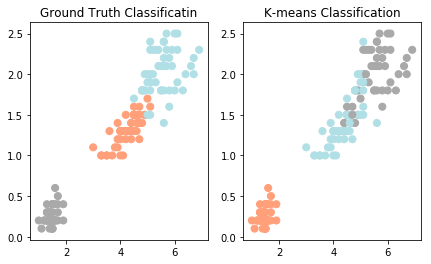

In [13]:
color_theme = np.array(['darkgray', 'lightsalmon', 'powderblue'])

plt.subplot(1, 2, 1)

plt.scatter(x = iris_df.Petal_Length, y = iris_df.Petal_Width, c = color_theme[iris.target], s =50)

plt.title('Ground Truth Classificatin')

plt.subplot(1, 2, 2)

plt.scatter(x = iris_df.Petal_Length, y = iris_df.Petal_Width, c = color_theme[clustering.labels_], s =50)

plt.title('K-means Classification')


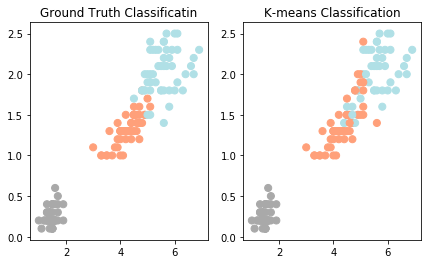

In [17]:
#Since there is labeling mistake, we will relabel using numpy

relabel = np.choose(clustering.labels_, [2,0,1]).astype(np.int64)

plt.subplot(1, 2, 1)

plt.scatter(x = iris_df.Petal_Length, y = iris_df.Petal_Width, c = color_theme[iris.target], s =50)

plt.title('Ground Truth Classificatin')

plt.subplot(1, 2, 2)

plt.scatter(x = iris_df.Petal_Length, y = iris_df.Petal_Width, c = color_theme[relabel], s =50)

plt.title('K-means Classification')

#### Evaluate your clustering results

In [15]:
print(classification_report(y, relabel))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        50
          1       0.74      0.78      0.76        50
          2       0.77      0.72      0.74        50

avg / total       0.83      0.83      0.83       150

